In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math 

## Data Set

In [65]:
df = pd.read_csv('gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [66]:
df.columns 

Index(['Gene One', 'Gene Two', 'Cancer Present'], dtype='object')

In [67]:
n = len(df.columns)
n

3

In [68]:
df[df.columns[n-1]].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [69]:
df[df.columns[n-1]].value_counts().index

Int64Index([1, 0], dtype='int64')

In [70]:
df[df.columns[n-1]].nunique()

2

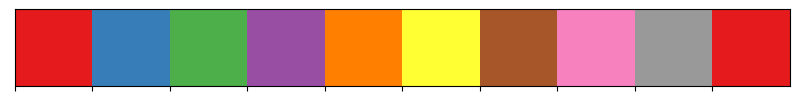

In [71]:
custom_palette = sns.color_palette("Set1",10)
sns.palplot(custom_palette)

https://www.codecademy.com/article/seaborn-design-ii

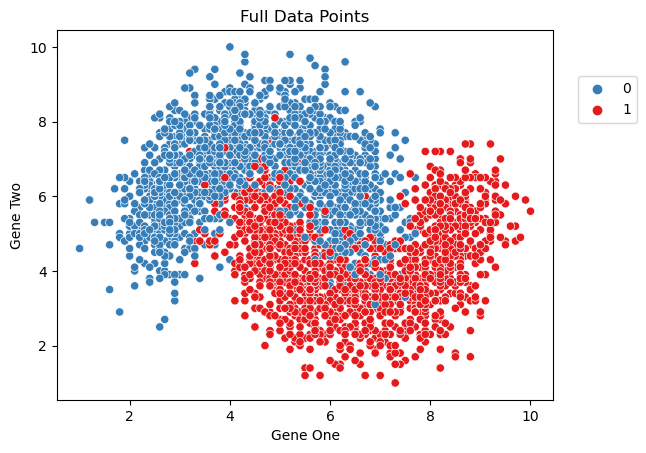

In [72]:
custom_palette = sns.color_palette("Set1", df[df.columns[2]].nunique()+1)
color_dict = dict()
markers_dict = dict()
j = 0

for i in df[df.columns[2]].value_counts().index:
    color_dict[i] = custom_palette[j]
    markers_dict[i] = 'o'
    j = j + 1

color_dict['Test Point'] = custom_palette[2]
markers_dict['Test Point'] = 'X'

# print(color_dict)
# print(markers_dict)

sns.scatterplot(x = df[df.columns[0]],y = df[df.columns[1]],hue=df[df.columns[2]],palette=color_dict,style=df[df.columns[2]],markers=markers_dict)
plt.title('Full Data Points')
plt.legend(loc=(1.05,0.75))

## Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df.drop(df.columns[n-1],axis=1)
X

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [75]:
y = df[df.columns[n-1]]
y

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64

In [76]:
train_percentage = 70
test_percentage = 100 - train_percentage

print('Train Percentage :',train_percentage)
print('Test Percentage :',test_percentage)

Train Percentage : 70
Test Percentage : 30


In [77]:
no_of_train_data = math.ceil((train_percentage * len(df)) / 100)
print('No of train data :',no_of_train_data)

no_of_test_data = len(df) - no_of_train_data
print('No of test data',no_of_test_data)

No of train data : 2100
No of test data 900


In [78]:
X_train = X.iloc[:no_of_train_data]
y_train = y[:no_of_train_data]
X_test = X.iloc[no_of_train_data:]
y_test = y[no_of_train_data:]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
X_train

,Gene One,Gene Two
2958,3.9,7.3
532,2.7,6.1
2197,6.9,6.5
956,4.2,5.2
2528,6.7,2.9
...,...,...
2742,7.8,3.3
2555,6.7,3.9
206,6.6,4.7
548,7.3,3.2


In [81]:
y_train

2958    1
532     0
2197    0
956     1
2528    1
       ..
2742    1
2555    1
206     1
548     1
2705    0
Name: Cancer Present, Length: 2100, dtype: int64

In [82]:
X_test 

,Gene One,Gene Two
775,4.1,6.1
39,2.5,4.8
2566,3.4,7.0
653,8.1,3.9
2474,5.8,7.1
...,...,...
302,5.4,6.1
1513,4.7,4.0
293,4.9,4.7
706,6.6,5.3


In [83]:
y_test

775     0
39      0
2566    0
653     1
2474    0
       ..
302     0
1513    1
293     1
706     0
2395    0
Name: Cancer Present, Length: 900, dtype: int64

## KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
k = math.floor(math.sqrt(len(df)))

if k%2==0 :
    k = k + 1

print(k)

55


In [86]:
knn = KNeighborsClassifier(n_neighbors=k)

In [87]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=55)

## Model Evaluation

In [88]:
y_pred = knn.predict(X_test)

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test,y_pred) * 100

94.11111111111111

In [91]:
confusion_matrix(y_test,y_pred)

array([[434,  29],
       [ 24, 413]], dtype=int64)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       463
           1       0.93      0.95      0.94       437

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900

